In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [160]:
# import data
# data = pd.read_csv('dataset/test/manual_data_categorical.csv')
# data = pd.read_csv('dataset/test/manual_data.csv')
data = pd.read_csv('dataset/temp/dataset.csv')
data.head(4)

,id,customers,customer_categories,region,items,item_categories,quantity,price,total_price,total_price_history,down_payment,payment_type,day_order,month_order,year_order,gap_payment_day
0,2,ERNA BIBBO,Perusahaan/UMKM,JAWA TENGAH,POUCH FURING,POUCH,200,6000,1200000,3000000,0.0,0,16,3,2022,22
1,2,ERNA BIBBO,Perusahaan/UMKM,JAWA TENGAH,POUCH FURING,POUCH,200,6000,1200000,3000000,0.0,0,17,5,2022,13
2,2,ERNA BIBBO,Perusahaan/UMKM,JAWA TENGAH,POUCH FURING,POUCH,100,6000,600000,3000000,0.0,0,16,7,2022,11
3,5,ARGA,Broker,YOGYAKARTA,BLOCKNOTE A6 SOFTCOVER,BLOCKNOTE,450,5800,2610000,2610000,NaN,2,3,10,2019,0


In [161]:
# initiate value
k = 20
n = len(data)

In [162]:
# encode data
encoded = data.apply(LabelEncoder().fit_transform)
encoded.head(4)

,id,customers,customer_categories,region,items,item_categories,quantity,price,total_price,total_price_history,down_payment,payment_type,day_order,month_order,year_order,gap_payment_day
0,0,169,6,8,221,21,129,25,172,154,0,0,15,2,2,25
1,0,169,6,8,221,21,129,25,172,154,0,0,16,4,2,16
2,0,169,6,8,221,21,87,25,99,154,0,0,15,6,2,14
3,1,55,1,27,15,2,170,24,309,141,104,2,2,9,0,3


In [163]:
# scale data
scaled = StandardScaler().fit_transform(encoded)
print(scaled)

[[-1.46450081 -0.83867326  0.46491903 ... -0.938155    0.60721866
   0.43418121]
 [-1.46450081 -0.83867326  0.46491903 ... -0.37584129  0.60721866
  -0.08549475]
 [-1.46450081 -0.83867326  0.46491903 ...  0.18647241  0.60721866
  -0.20097829]
 ...
 [ 2.19043772 -1.60942463  1.24439912 ...  0.46762927  0.60721866
  -0.83613779]
 [ 2.19601778  0.21886932 -1.09404115 ...  0.46762927  0.60721866
  -0.83613779]
 [ 2.20159784 -1.28080971  0.07517899 ...  0.46762927  0.60721866
  -0.83613779]]


In [164]:
# feature extraction
pca = PCA(n_components=2)
X = pca.fit_transform(scaled)

In [165]:
# Perform KNN to identify neighbor
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)
d, i = knn.kneighbors(X)
dist = d[:, 1:]
indices = i[:, 1:]
# print(indices)

In [166]:
# calculate triangular kernel value
Vx = np.prod(dist, axis=1)
mulByK = dist * (k-1)
Hx = mulByK.sum(axis=1)

# onePernVx = 1 / (n * Vx)
de = 1 - (dist / Hx.reshape(n,1))
sum = Vx * (de.sum(axis=1))
data = np.maximum(0, 1 - np.abs(sum))

# Create an array of zeros with the same shape as indices
pxMatrix = np.zeros(indices.shape)

# Loop through the indices array and replace with the corresponding value
for i in range(n):
    for j in range(k-1):
        pxMatrix[i, j] = data[indices[i, j]]


In [167]:

indptr = np.arange(len(data)+1) * 1
indices = indices.ravel()
A = csr_matrix((pxMatrix.ravel(), indices, indptr), shape=(n, n))
n_components, labels = connected_components(csgraph=A, directed=False, return_labels=True)

In [168]:
# knn = NearestNeighbors(n_neighbors=k)
# knn.fit(X)
# dist, indices = knn.kneighbors(X)
# # A = kneighbors_graph(knn, n_neighbors=n_neighbors, mode='distance')
# data = np.maximum(0, 1 - dist / 1.0)
# indptr = np.arange(len(X) + 1) * k
# indices = indices.ravel()
# A = csr_matrix((data.ravel(), indices, indptr), shape=(len(X), len(X)))
# n_components, labels = connected_components(csgraph=A, directed=False, return_labels=True)

In [169]:
n_components

7

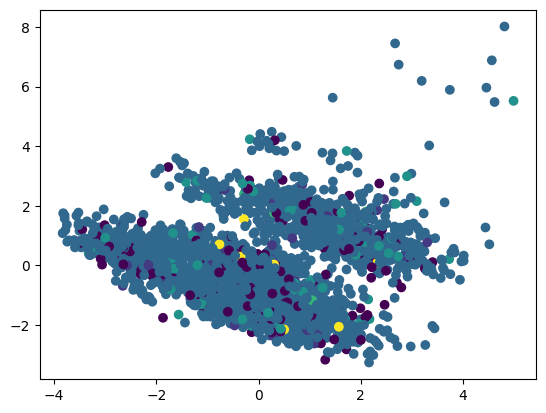

In [170]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [171]:
n_components

7